In [1]:
import re
from pickle import dump
from unicodedata import normalize
from numpy import array
import string
import codecs
import numpy as np

import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

from pickle import load
from numpy.random import rand
from numpy.random import shuffle
 
# load a dataset
def load_sentences(dataFileName):
    with codecs.open(dataFileName, 'r', 'utf-8') as fin:
        sentences = fin.readlines()
    return sentences

def create_localEmbedding(sentences):    
    wordSet = [[wd.strip() for wd in word.split(' ') if wd.strip()] for word in sentences]
    localW2V = Word2Vec(wordSet, size=200, workers=10, window=111, min_count=1, max_vocab_size=None, sg=1, hs=1)
    return localW2V

def encode_words2vec(localModel, word):
    if word in globalModelVec.vocab:
        w2v_global = globalModel[word]
    else:
        w2v_global = np.random.normal(0, 0.9, 300)#np.zeros((300,), dtype=float)
    w2v_local = localModel[word]
    w2v_500 = np.concatenate((w2v_global, w2v_local), axis=0)
    return(w2v_500)

# max sentence length
def max_length(lines):
    return max(len(line.split()) for line in lines)

    # encode and pad sequences
def encode_sequences(encoder, MaxWordsPerLine, sentences):
    wordSet = [[wd.strip() for wd in word.split(' ') if wd.strip()] for word in sentences]

    NumLines = len(sentences)
    FeaturesPerVector = 500

    Seq  = np.zeros((NumLines,MaxWordsPerLine,FeaturesPerVector))
    iter1 = 0
    for lines in wordSet:
        iter2 = 0
        for words in lines :
            Seq[iter1][iter2][:] = encode_words2vec(encoder, words)
            iter2 = iter2 + 1
        iter1 = iter1 + 1

    return Seq

In [2]:
en_sentences = load_sentences('train_en.txt')
sen_sentences = load_sentences('train_sen.txt')

en_sentences = en_sentences[:4000]
sen_sentences = sen_sentences[:4000]

In [3]:
globalModel = KeyedVectors.load_word2vec_format('C:/Users/sudha/Downloads/GoogleNews-vectors-negative300.bin.gz',binary=True)
globalModelVec = globalModel.wv

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [24]:
globalModelVec.word_vec("the")

array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281,
       -0.12060547,  0.03515625, -0.11865234,  0.04394531,  0.03015137,
       -0.05688477, -0.07617188,  0.01287842,  0.04980469, -0.08496094,
       -0.06347656,  0.00628662, -0.04321289,  0.02026367,  0.01330566,
       -0.01953125,  0.09277344, -0.171875  , -0.00131989,  0.06542969,
        0.05834961, -0.08251953,  0.0859375 , -0.00318909,  0.05859375,
       -0.03491211, -0.0123291 , -0.0480957 , -0.00302124,  0.05639648,
        0.01495361, -0.07226562, -0.05224609,  0.09667969,  0.04296875,
       -0.03540039, -0.07324219,  0.03271484, -0.06176758,  0.00787354,
        0.0035553 , -0.00878906,  0.0390625 ,  0.03833008,  0.04443359,
        0.06982422,  0.01263428, -0.00445557, -0.03320312, -0.04272461,
        0.09765625, -0.02160645, -0.0378418 ,  0.01190186, -0.01391602,
       -0.11328125,  0.09326172, -0.03930664, -0.11621094,  0.02331543,
       -0.01599121,  0.02636719,  0.10742188, -0.00466919,  0.09

In [25]:
globalModelVec['the']

array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281,
       -0.12060547,  0.03515625, -0.11865234,  0.04394531,  0.03015137,
       -0.05688477, -0.07617188,  0.01287842,  0.04980469, -0.08496094,
       -0.06347656,  0.00628662, -0.04321289,  0.02026367,  0.01330566,
       -0.01953125,  0.09277344, -0.171875  , -0.00131989,  0.06542969,
        0.05834961, -0.08251953,  0.0859375 , -0.00318909,  0.05859375,
       -0.03491211, -0.0123291 , -0.0480957 , -0.00302124,  0.05639648,
        0.01495361, -0.07226562, -0.05224609,  0.09667969,  0.04296875,
       -0.03540039, -0.07324219,  0.03271484, -0.06176758,  0.00787354,
        0.0035553 , -0.00878906,  0.0390625 ,  0.03833008,  0.04443359,
        0.06982422,  0.01263428, -0.00445557, -0.03320312, -0.04272461,
        0.09765625, -0.02160645, -0.0378418 ,  0.01190186, -0.01391602,
       -0.11328125,  0.09326172, -0.03930664, -0.11621094,  0.02331543,
       -0.01599121,  0.02636719,  0.10742188, -0.00466919,  0.09

In [27]:
globalModelVec.vector_size

300

In [6]:
w2v_en = create_localEmbedding(en_sentences)
w2v_sen = create_localEmbedding(sen_sentences)

C:\Users\sudha\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [7]:
MaxWordsPerLine_en = max_length(en_sentences)
MaxWordsPerLine_sen = max_length(sen_sentences)

[MaxWordsPerLine_en, MaxWordsPerLine_sen]

[148, 110]

In [8]:
newVec_en = encode_sequences(w2v_en, MaxWordsPerLine_en, en_sentences)
newVec_sen = encode_sequences(w2v_sen, MaxWordsPerLine_sen, sen_sentences)

[newVec_en.shape, newVec_sen.shape]

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[(4000, 148, 500), (4000, 110, 500)]

In [9]:
[len(w2v_en.wv.vocab),  len(w2v_sen.wv.vocab),  len(globalModelVec.vocab)]

[16537, 14406, 3000000]

In [11]:
def decode_vec2word(prediction,model):
    lines = prediction.shape[0]
    words = prediction.shape[1]
    w2vlength = 500 
    a = []
    for j in range(0,lines):
        op = ''
        for i  in range(0,words):
            #g = prediction[j][i][300:500]
            g = prediction[j][i][:300]
            if (np.count_nonzero(g) > 0):
                #decodeWord = model.most_similar( positive = [g] )[0][0]
                decodeWord = globalModel.most_similar( positive = [g] )[0][0]
                op = op + ' ' +decodeWord
        a.append(op)
    return(a)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM, Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, Dense, Dropout
#from Attention import AttentionLayer


# define NMT model
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    
    #model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
    model.add(LSTM(500, input_shape= (MaxWordsPerLine_en, 500), return_sequences=True ) )
    model.add(Flatten())
    model.add(Dense(500))
    model.add(RepeatVector(MaxWordsPerLine_sen))
    model.add(LSTM(500, return_sequences=True))
    model.add(TimeDistributed(Dense(500)))

    
    return model

 
model = define_model(44682, 39188, MaxWordsPerLine_en, MaxWordsPerLine_sen, 500)
model.compile(optimizer='adam', loss='mean_squared_error')

# summarize defined model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 148, 500)          2002000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 74000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               37000500  
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 110, 500)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 110, 500)          2002000   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 110, 500)          250500    
Total params: 41,255,000
Trainable params: 41,255,000
Non-trainable params: 0
__________________________________________

In [14]:
model.input_shape

(None, 148, 500)

In [17]:
trainX = newVec_en[:3200]
trainY = newVec_sen[:3200]

valX = newVec_en[3200:3600]
valY = newVec_sen[3200:3600] 

testX = newVec_en[3600:]
testY = newVec_sen[3600:]



In [28]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
# fit model
#filename = 'model.h5'

#model = load_model('model.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(trainX, trainY, epochs=10, batch_size=800, validation_data=(valX, valY), callbacks=[checkpoint], verbose=2)

Train on 3200 samples, validate on 400 samples
Epoch 1/10
 - 188s - loss: 0.0378 - val_loss: 0.0347

Epoch 00001: val_loss improved from inf to 0.03474, saving model to model.h5
Epoch 2/10
 - 182s - loss: 0.0332 - val_loss: 0.0295

Epoch 00002: val_loss improved from 0.03474 to 0.02951, saving model to model.h5
Epoch 3/10
 - 177s - loss: 0.0311 - val_loss: 0.0290

Epoch 00003: val_loss improved from 0.02951 to 0.02898, saving model to model.h5
Epoch 4/10
 - 178s - loss: 0.0306 - val_loss: 0.0287

Epoch 00004: val_loss improved from 0.02898 to 0.02870, saving model to model.h5
Epoch 5/10
 - 175s - loss: 0.0304 - val_loss: 0.0285

Epoch 00005: val_loss improved from 0.02870 to 0.02854, saving model to model.h5
Epoch 6/10
 - 176s - loss: 0.0303 - val_loss: 0.0284

Epoch 00006: val_loss improved from 0.02854 to 0.02843, saving model to model.h5
Epoch 7/10
 - 175s - loss: 0.0302 - val_loss: 0.0284

Epoch 00007: val_loss improved from 0.02843 to 0.02836, saving model to model.h5
Epoch 8/10
 

In [29]:
trainY.shape

(3200, 110, 500)

dict_keys(['val_loss', 'loss'])


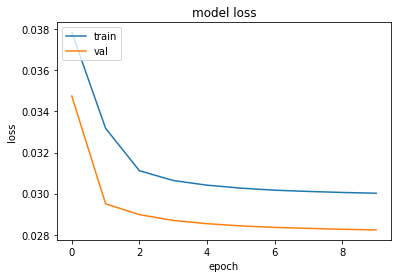

In [30]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
prediction = model.predict(testX[:5])

In [32]:
prediction.shape

(5, 110, 500)

In [33]:
prediction_words = decode_vec2word(prediction, w2v_sen)

In [25]:
prediction_words

[' smalltown aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming aiming',
 ' Aton_Soumache Aton_Soumache Catherine_Mathis Catherine_Mathis Catherine_Mathis interval_ScanSource interval_ScanSource interval_ScanSource interval_ScanSource interval_ScanSource interval_ScanSource interval_ScanSource 

In [27]:
sen_sentences[1800:1805]

['The Soviets would offer an unchanging diet of coffee , bread , soup , and potatoes .\n',
 'The four occupying powers of Berlin would alternate control of the prison on a monthly basis , each having the responsibility for a total of three months out of the year .\n',
 'Each nation in charge would bring its own cook and , in the American , French , and British months , feed the prisoners better than regulations allowed .\n',
 'Besides the sixty or so soldiers on duty in or around the prison at any given time , there were teams of professional civilian warders from each of the four countries , four prison directors and their deputies , four army medical officers , cooks , translators , waiters , porters and others .\n',
 "The prison was demolished in 1987 , largely to prevent it from becoming a Neo-Nazi shrine , after the death of its final remaining prisoner , Rudolf Hess , who had been the prison 's sole occupant after the release of Speer and von Schirach in 1966 .\n"]